# Assignment: Xarray Fundamentals with Atmospheric Radiation Data

In this assignment, we will use Xarray to analyze top-of-atmosphere radiation data from [NASA's CERES project](https://ceres.larc.nasa.gov/).

<img src="https://upload.wikimedia.org/wikipedia/commons/b/bb/The-NASA-Earth%27s-Energy-Budget-Poster-Radiant-Energy-System-satellite-infrared-radiation-fluxes.jpg" width=65%>

_Public domain, by NASA, from Wikimedia Commons_


A pre-downloaded and subsetted a portion of the CERES dataset is available here: http://ldeo.columbia.edu/~rpa/CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc. The size of the data file is 702.53 MB. It may take a few minutes to download.

Please review the CERES [FAQs](https://ceres.larc.nasa.gov/resources/faqs) before getting started.

Start by importing Numpy, Matplotlib, and Xarray. Set the default figure size to (12, 6).

In [1]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (12, 6)
%config InlineBackend.figure_format = 'retina'

Next, download the NetCDF file using pooch.

In [2]:
fname = '/data9/GR6901/data/CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc'
print(fname)

/data9/GR6901/data/CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc


## 1) Opening data and examining metadata

### 1.1) Open the dataset and display its contents 


In [3]:
dataset = xr.open_dataset(fname)
dataset


ERROR 1: PROJ: proj_create_from_database: Open of /opt/sw/anaconda3/2023.09/envs/pangeo23/share/proj failed


<xarray.Dataset>
Dimensions:                      (lon: 360, time: 203, lat: 180)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * time                         (time) datetime64[ns] 2000-03-15 ... 2017-01-15
  * lat                          (lat) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Data variables: (12/14)
    toa_sw_all_mon               (time, lat, lon) float32 ...
    toa_lw_all_mon               (time, lat, lon) float32 ...
    toa_net_all_mon              (time, lat, lon) float32 ...
    toa_sw_clr_mon               (time, lat, lon) float32 ...
    toa_lw_clr_mon               (time, lat, lon) float32 ...
    toa_net_clr_mon              (time, lat, lon) float32 ...
    ...                           ...
    toa_cre_net_mon              (time, lat, lon) float32 ...
    solar_mon                    (time, lat, lon) float32 ...
    cldarea_total_daynight_mon   (time, lat, lon) float32 ...
    cldpress_total_daynight_mon  (time, lat, lon) float32 ...
    cldtemp_total_daynight_mon   (time, lat, lon) float32 ...
    cldtau_total_day_mon         (time, lat, lon) float32 ...
Attributes:
    title:             CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Mo...
    institution:       NASA/LaRC (Langley Research Center) Hampton, Va
    Conventions:       CF-1.4
    comment:           Data is from East to West and South to North.
    Version:           Edition 4.0; Release Date March 7, 2017
    Fill_Value:        Fill Value is -999.0
    DOI:               10.5067/TERRA+AQUA/CERES/EBAF-TOA_L3B.004.0
    Production_Files:  List of files used in creating the present Master netC...

### 1.2) Print out the `long_name` attribute of each variable
Print `variable`: `long name` for each variable. Format the output so that the start of the `long name` attributes are aligned. 

In [4]:
for var in dataset.data_vars:
    long_name = dataset[var].attrs['long_name']
    print(f"{var:<25}: {long_name}")


toa_sw_all_mon           : Top of The Atmosphere Shortwave Flux, Monthly Means, All-Sky conditions
toa_lw_all_mon           : Top of The Atmosphere Longwave Flux, Monthly Means, All-Sky conditions
toa_net_all_mon          : Top of The Atmosphere Net Flux, Monthly Means, All-Sky conditions
toa_sw_clr_mon           : Top of The Atmosphere Shortwave Flux, Monthly Means, Clear-Sky conditions
toa_lw_clr_mon           : Top of The Atmosphere Longwave Flux, Monthly Means, Clear-Sky conditions
toa_net_clr_mon          : Top of The Atmosphere Net Flux, Monthly Means, Clear-Sky conditions
toa_cre_sw_mon           : Top of The Atmosphere Cloud Radiative Effects Shortwave Flux, Monthly Means
toa_cre_lw_mon           : Top of The Atmosphere Cloud Radiative Effects Longwave Flux, Monthly Means
toa_cre_net_mon          : Top of The Atmosphere Cloud Radiative Effects Net Flux, Monthly Means
solar_mon                : Incoming Solar Flux, Monthly Means
cldarea_total_daynight_mon: Cloud Area Fraction, M

## 2) Basic reductions, arithmetic, and plotting

### 2.1) Calculate the time-mean of the entire dataset

In [5]:
time_mean = dataset.mean(dim='time')
time_mean

<xarray.Dataset>
Dimensions:                      (lon: 360, lat: 180)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * lat                          (lat) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Data variables: (12/14)
    toa_sw_all_mon               (lat, lon) float32 122.3 122.3 ... 104.4 104.4
    toa_lw_all_mon               (lat, lon) float32 141.1 141.1 ... 194.1 194.1
    toa_net_all_mon              (lat, lon) float32 -91.29 -91.29 ... -126.3
    toa_sw_clr_mon               (lat, lon) float32 119.9 119.9 ... 89.47 89.47
    toa_lw_clr_mon               (lat, lon) float32 140.2 140.2 ... 200.4 200.4
    toa_net_clr_mon              (lat, lon) float32 -88.03 -88.03 ... -117.6
    ...                           ...
    toa_cre_net_mon              (lat, lon) float32 -3.253 -3.251 ... -8.651
    solar_mon                    (lat, lon) float32 172.1 172.1 ... 172.3 172.3
    cldarea_total_daynight_mon   (lat, lon) float32 51.52 51.52 ... 78.93 78.93
    cldpress_total_daynight_mon  (lat, lon) float32 486.5 486.5 ... 766.9 766.9
    cldtemp_total_daynight_mon   (lat, lon) float32 225.2 225.2 ... 247.9 247.9
    cldtau_total_day_mon         (lat, lon) float32 4.158 4.158 ... 4.821 4.821

### 2.2) From this, make a 2D plot of the the time-mean Top of Atmosphere (TOA) Longwave, Shortwave, and Incoming Solar Radiation
(Use "All-Sky" conditions)

Note the sign conventions on each variable.

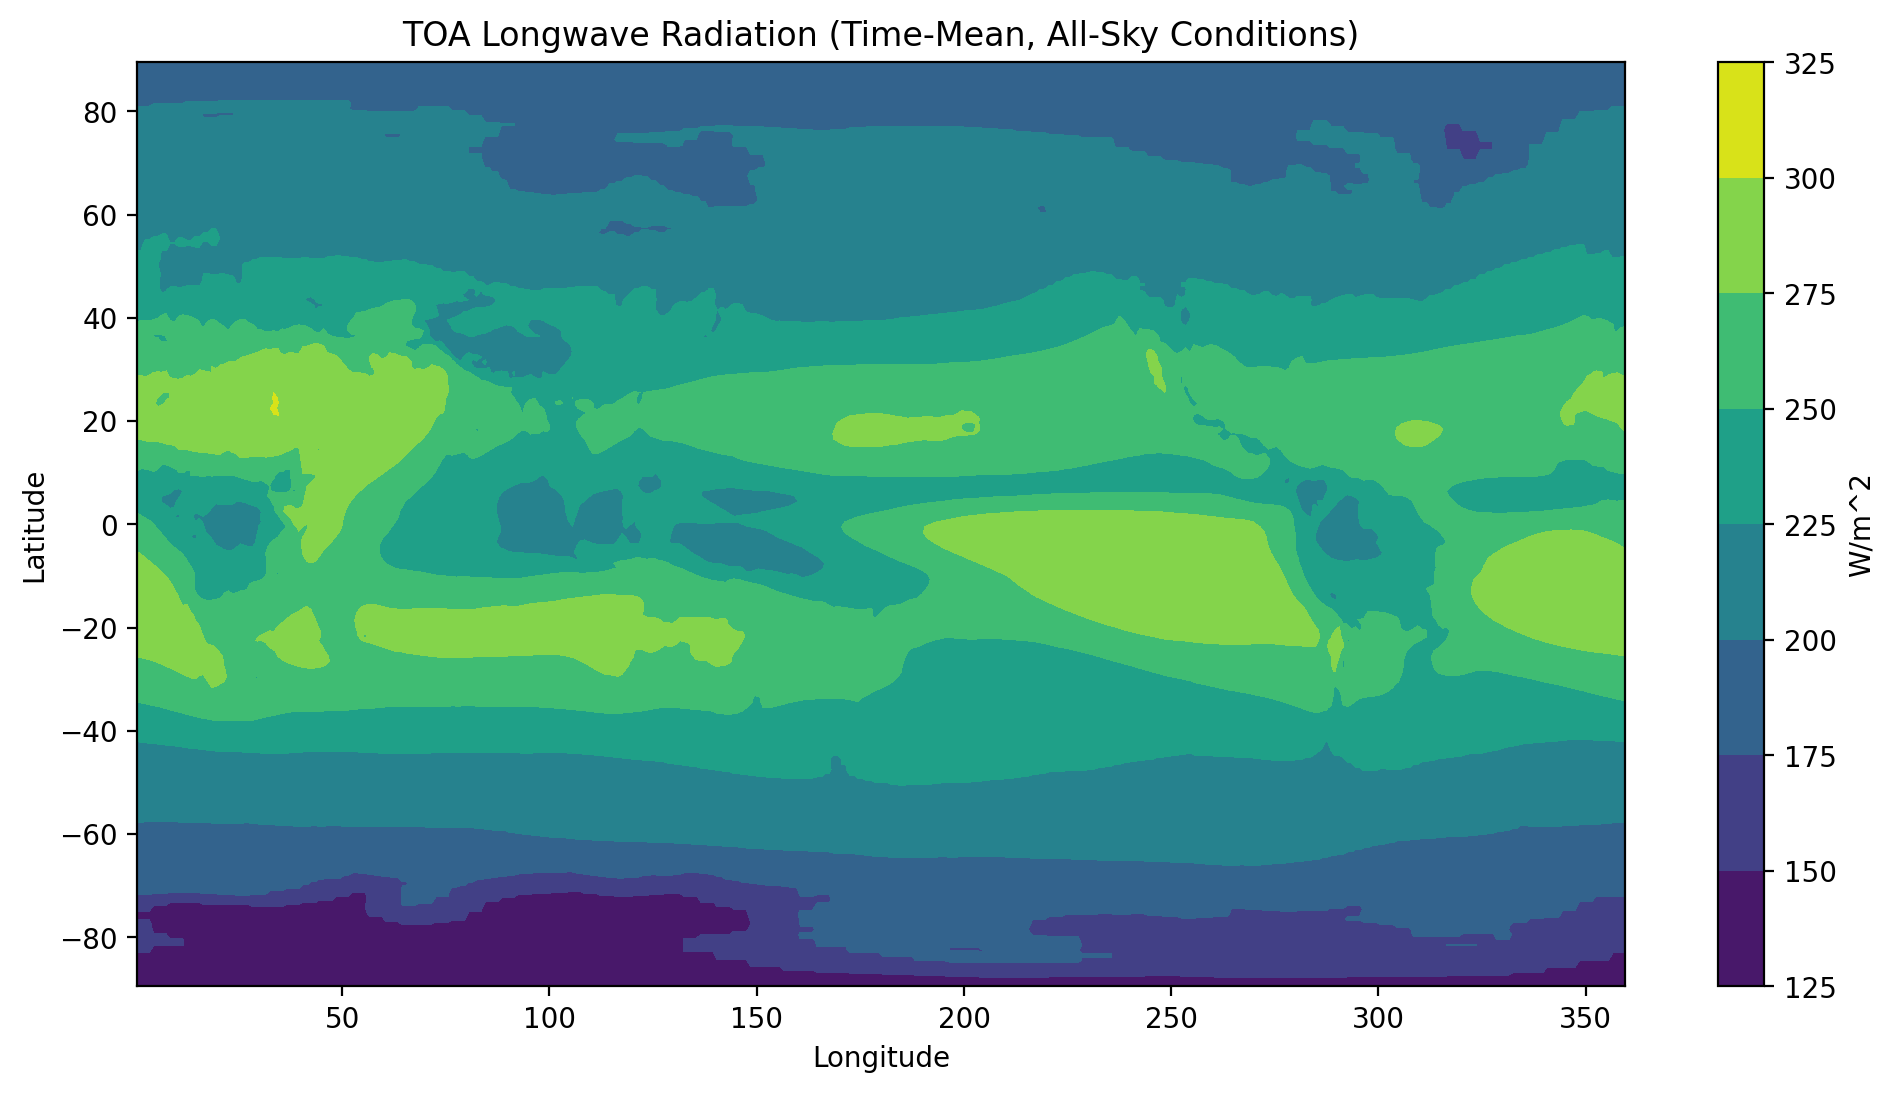

In [6]:
plt.figure(figsize=(12, 6))
plt.contourf(time_mean['lon'], time_mean['lat'], time_mean['toa_lw_all_mon'])
plt.title('TOA Longwave Radiation (Time-Mean, All-Sky Conditions)')
plt.colorbar(label='W/m^2')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


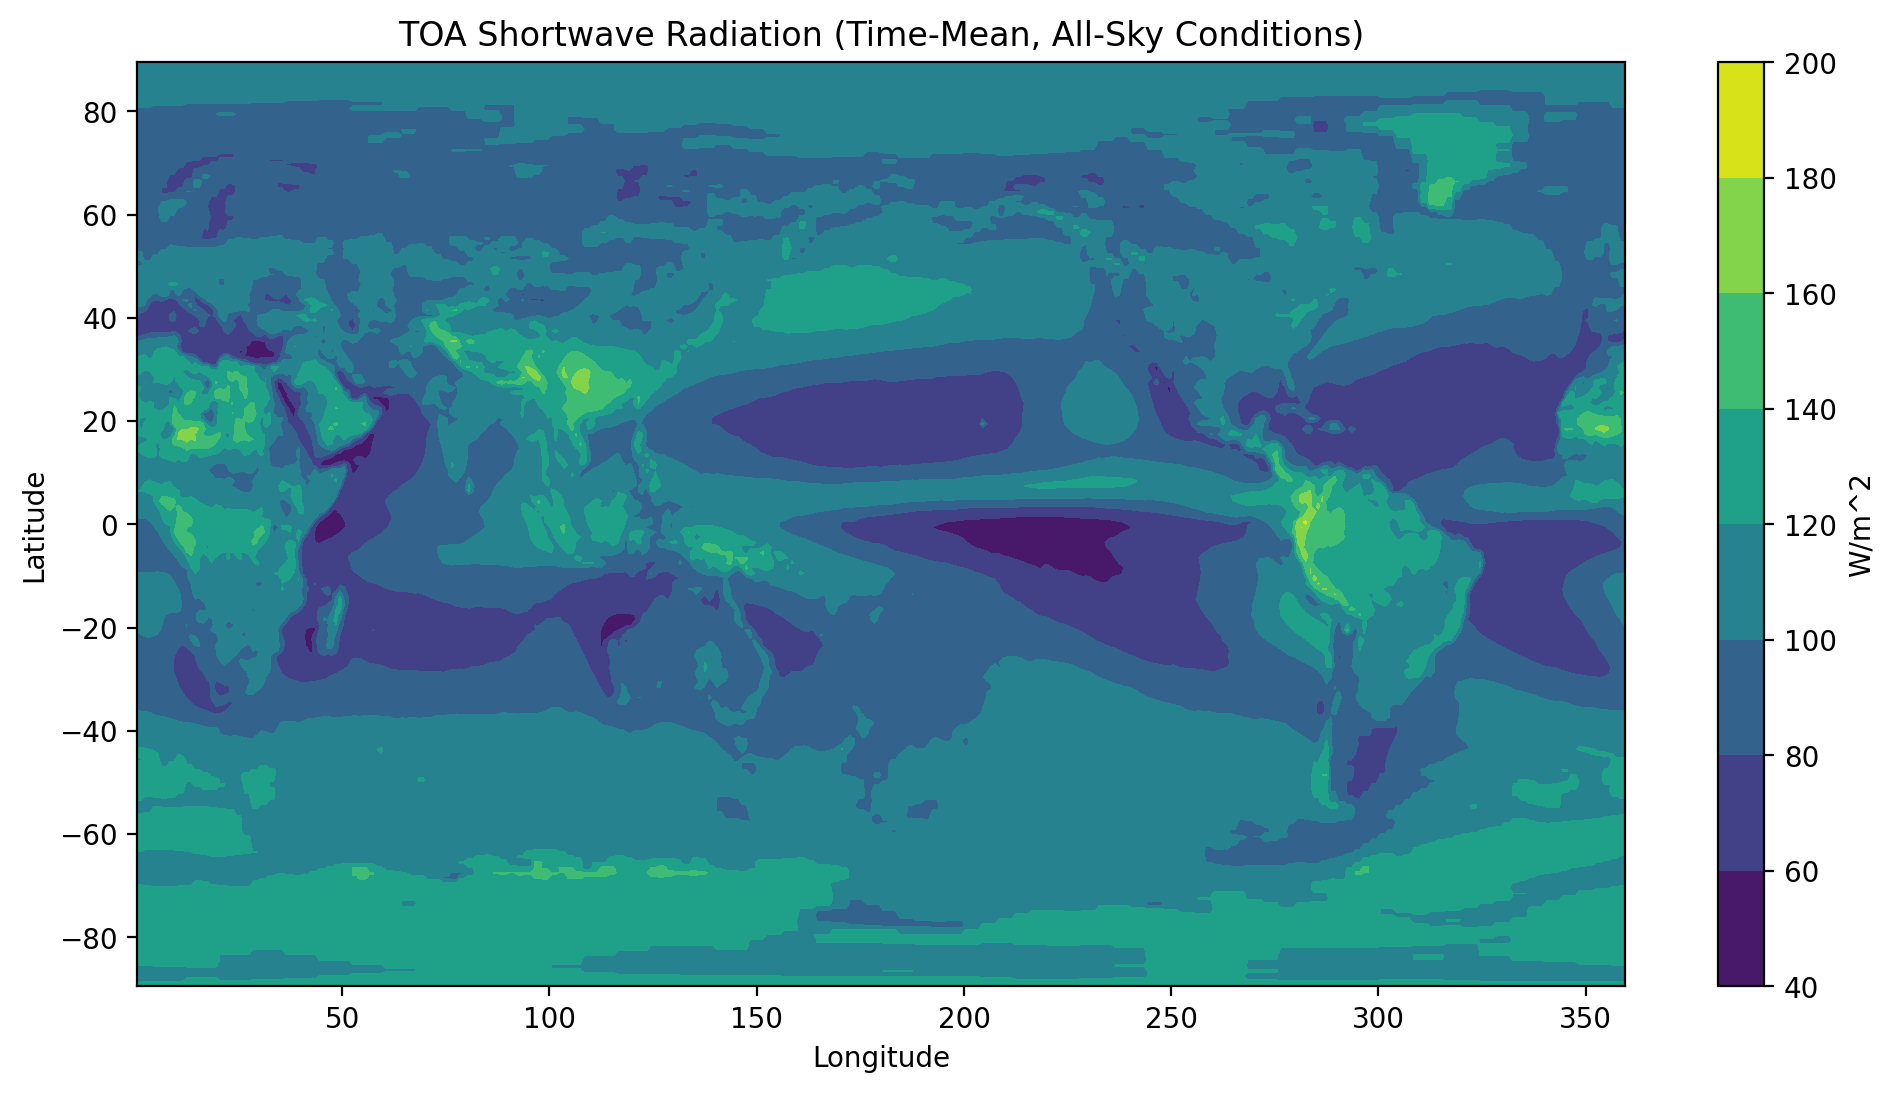

In [7]:
plt.figure(figsize=(12, 6))
plt.contourf(time_mean['lon'], time_mean['lat'], time_mean['toa_sw_all_mon'])
plt.title('TOA Shortwave Radiation (Time-Mean, All-Sky Conditions)')
plt.colorbar(label='W/m^2')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


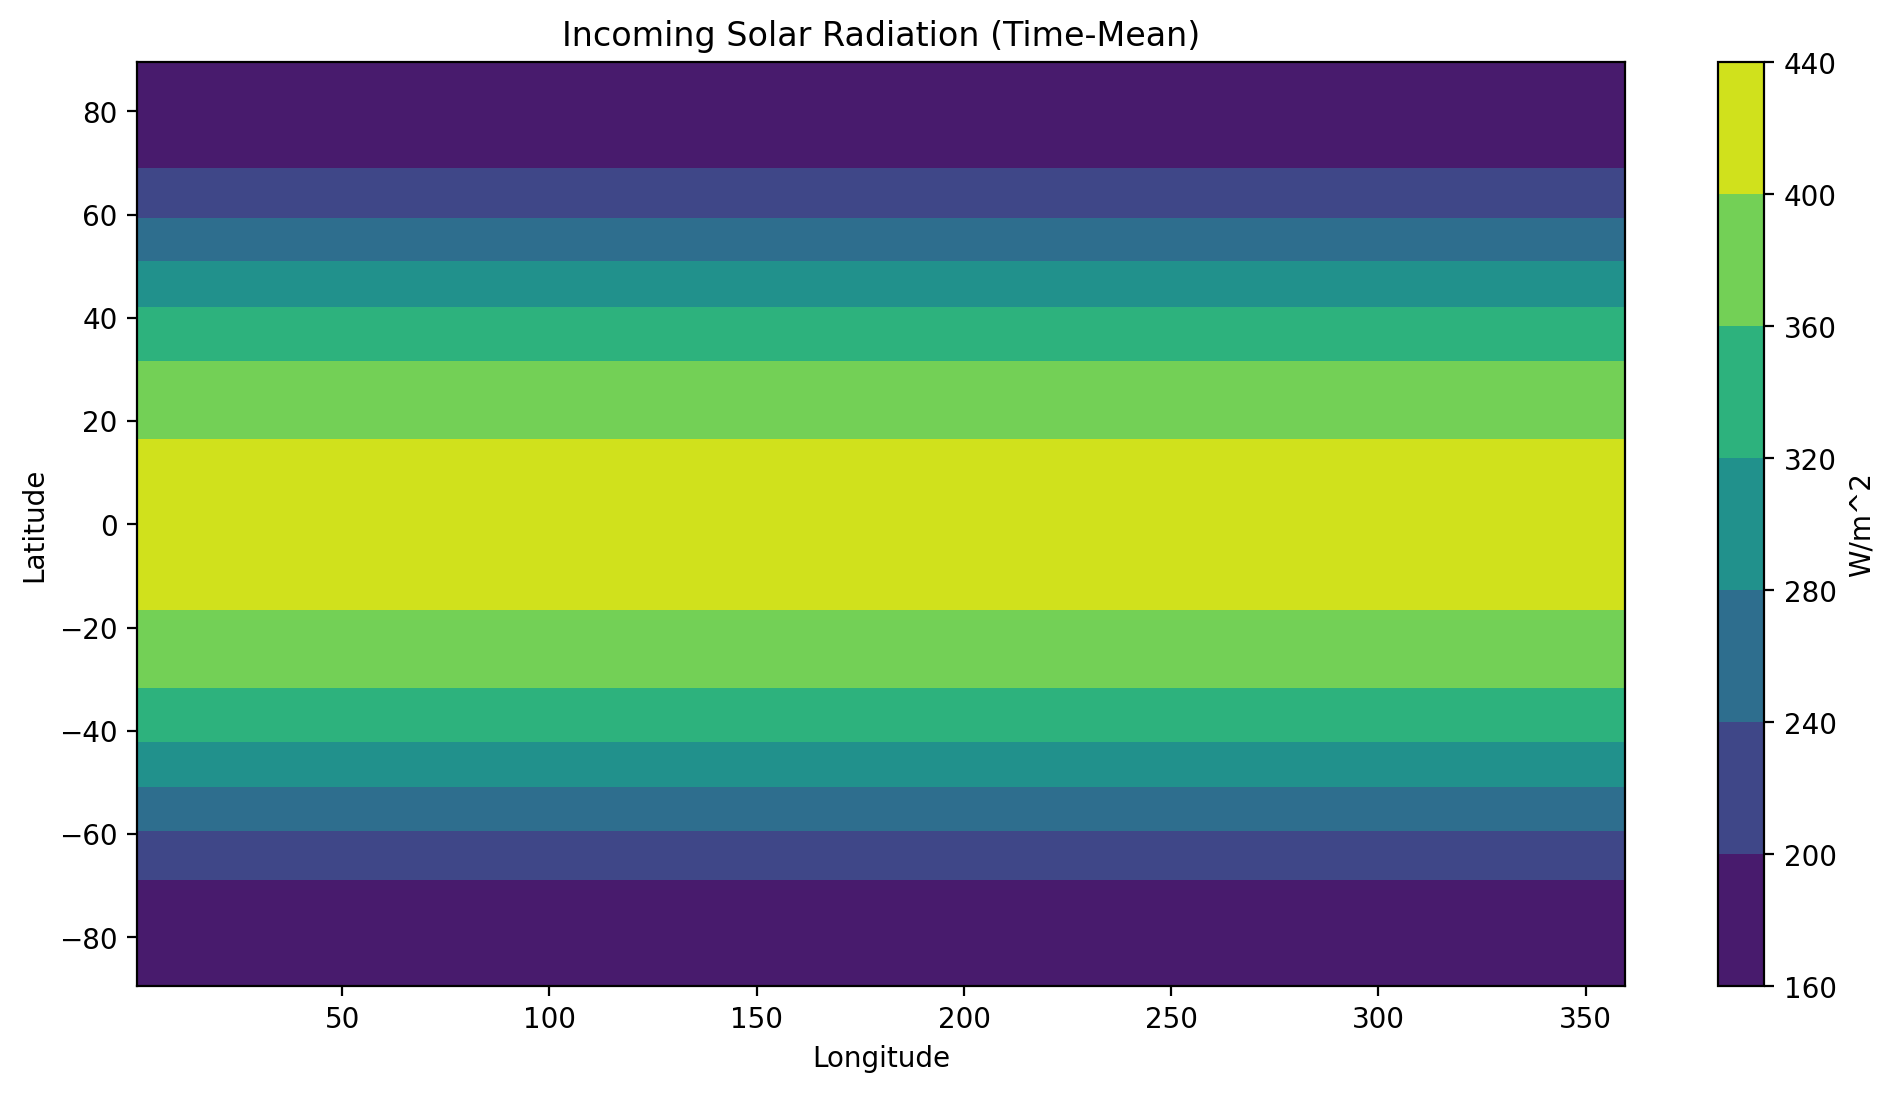

In [8]:
plt.figure(figsize=(12, 6))
plt.contourf(time_mean['lon'], time_mean['lat'], time_mean['solar_mon'])
plt.title('Incoming Solar Radiation (Time-Mean)')
plt.colorbar(label='W/m^2')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### 2.3) Add up the three variables above and verify (visually) that they are equivalent to the TOA net flux

You have to pay attention to and think carefully about the sign conventions (positive or negative) for each variable in order for the variables to sum to the right TOA net flux. Refer to the NASA figure at the top of the page to understand incoming and outgoing radiation.

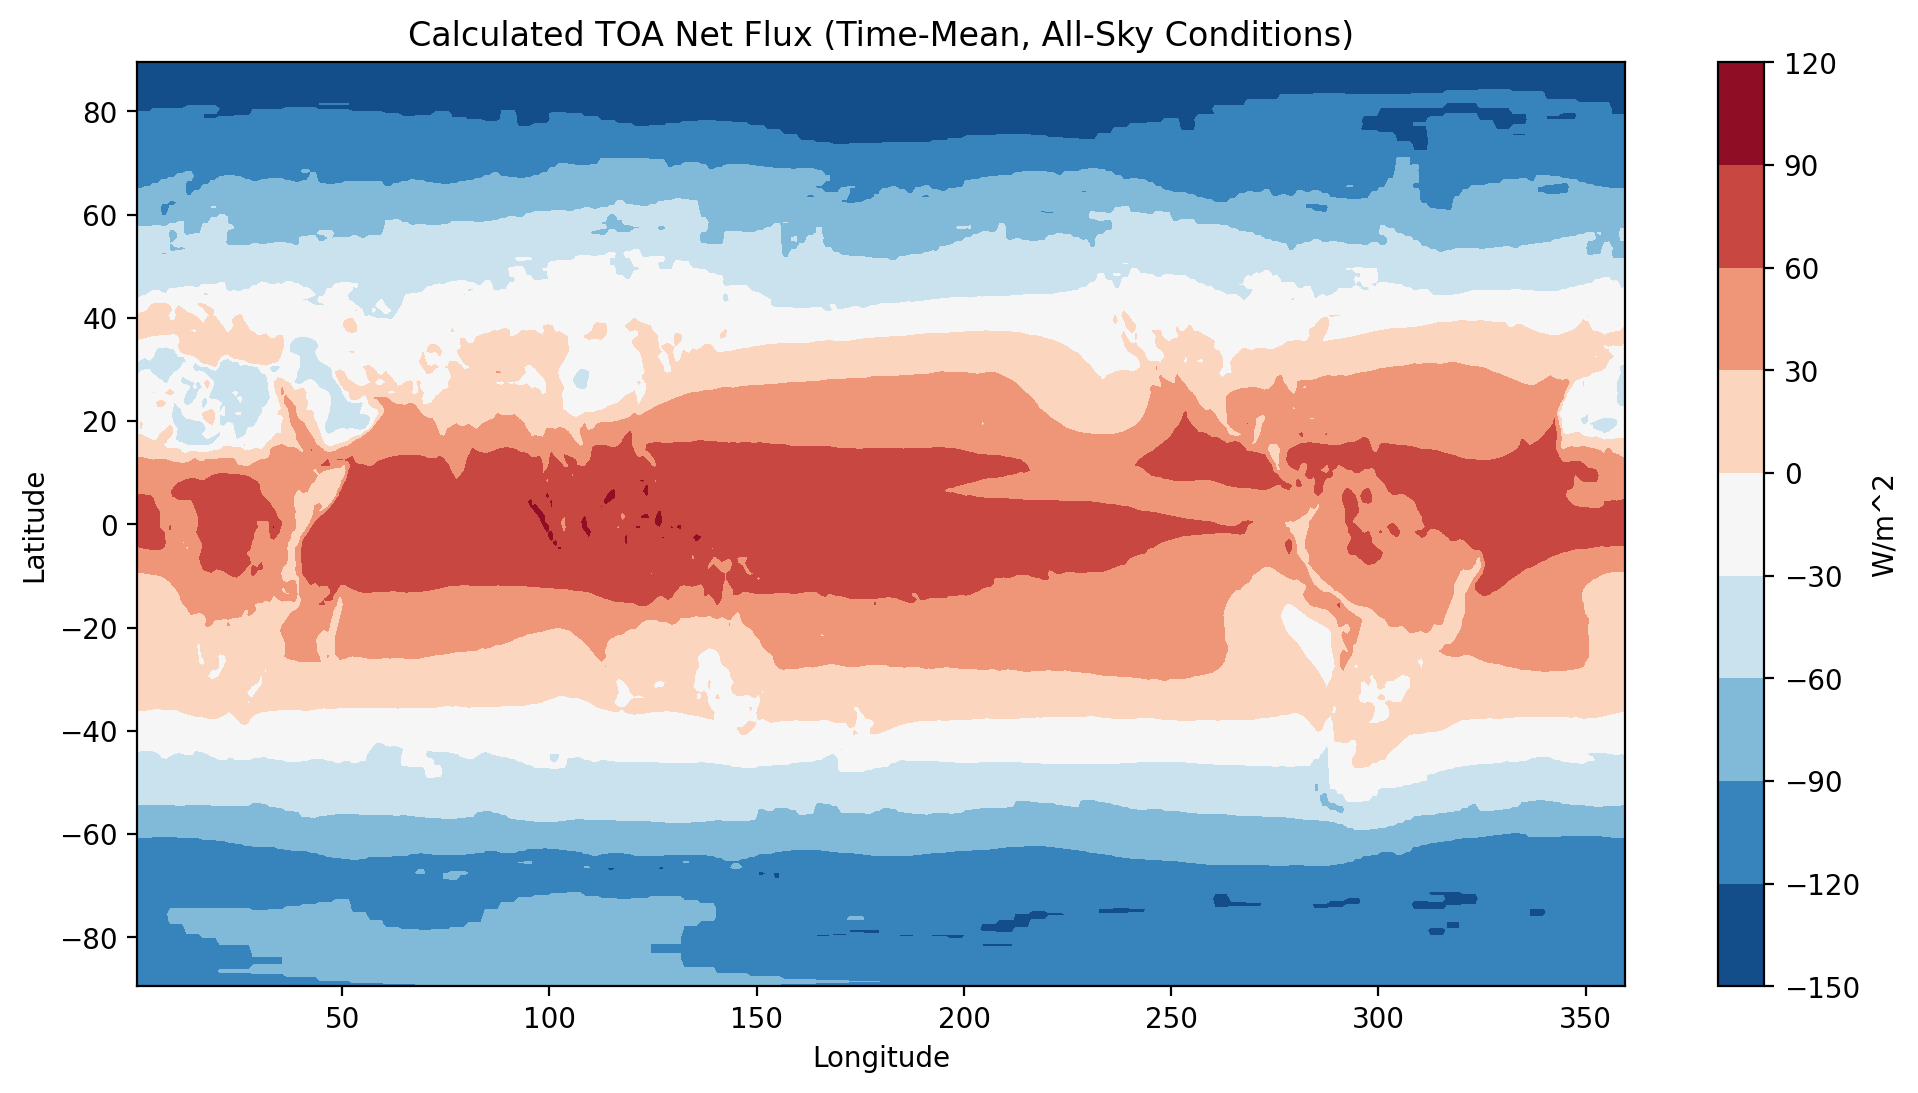

In [9]:
calculated_net_flux = time_mean['solar_mon'] - (time_mean['toa_sw_all_mon'] + time_mean['toa_lw_all_mon'])

plt.figure(figsize=(12, 6))
plt.contourf(time_mean['lon'], time_mean['lat'], calculated_net_flux, cmap='RdBu_r')
plt.title('Calculated TOA Net Flux (Time-Mean, All-Sky Conditions)')
plt.colorbar(label='W/m^2')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

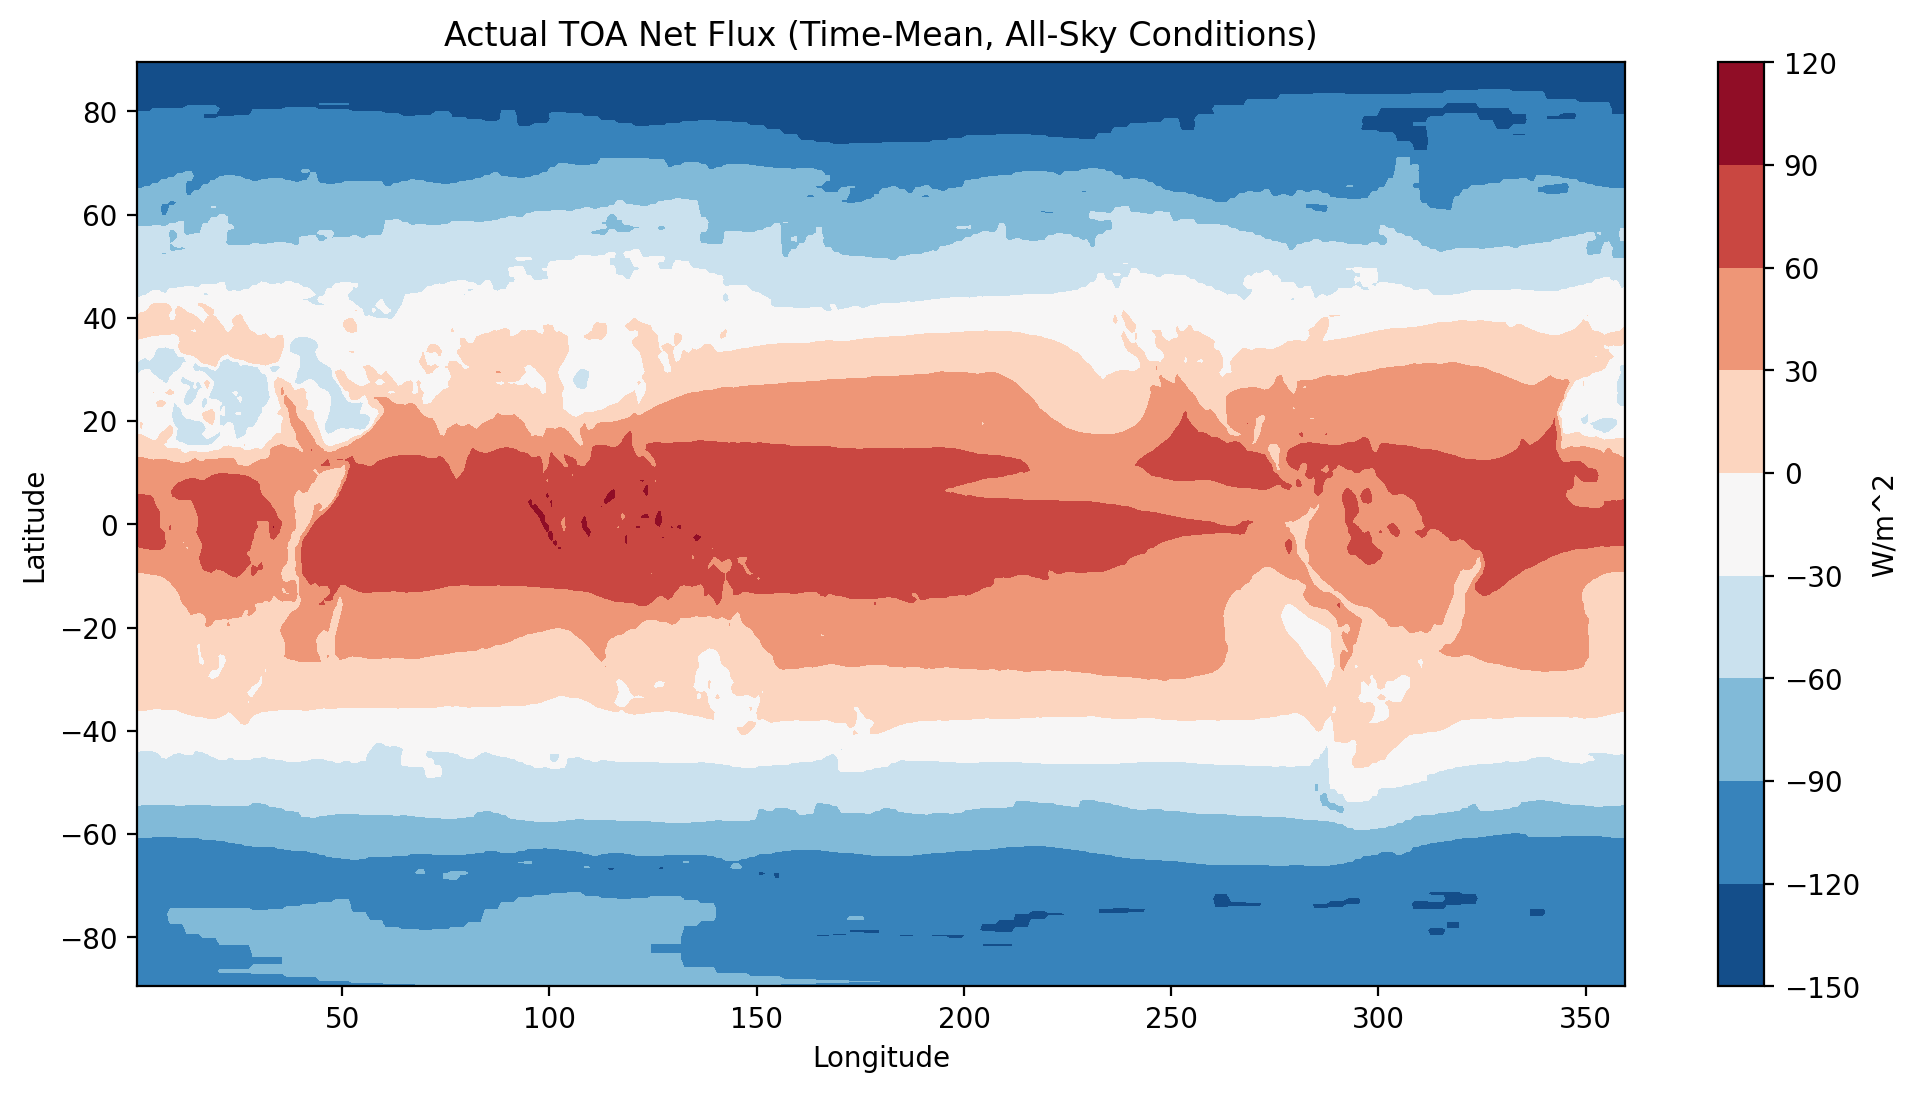

In [10]:
plt.figure(figsize=(12, 6))
plt.contourf(time_mean['lon'], time_mean['lat'], time_mean['toa_net_all_mon'], cmap='RdBu_r')
plt.title('Actual TOA Net Flux (Time-Mean, All-Sky Conditions)')
plt.colorbar(label='W/m^2')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Based on picture observation, the theoretical TOA net radiation based on the above sign convention is almost the same as the real TOA

## 3) Mean and weighted mean

### 3.1) Calculate the global (unweighted) mean of TOA net radiation

Since the Earth is approximately in radiative balance, the net TOA radiation should be zero. But taking the naive mean from this dataset, you should find a number far from zero. Why?

In [11]:
global_mean_net_radiation_unweighted = time_mean['toa_net_all_mon'].mean(dim=['lat', 'lon'])
print(f"Global mean of TOA net radiation (unweighted): {global_mean_net_radiation_unweighted.values} W/m^2")


Global mean of TOA net radiation (unweighted): -28.72901153564453 W/m^2


The answer is that each "pixel" or "grid point" of this dataset does not represent an equal area of Earth's surface. So naively taking the mean, i.e. giving equal weight to each point, gives the wrong answer.

On a lat / lon grid, the relative area of each grid point is proportional to $\cos(\lambda)$. ($\lambda$ is latitude)

### 3.2) Create a `weight` array proportional to $\cos(\lambda)$

Think carefully a about radians vs. degrees


In [12]:
latitudes = time_mean['lat'].values
latitudes_in_radians = np.deg2rad(latitudes)
weights = np.cos(latitudes_in_radians)
weights = weights / weights.mean()


### 3.3) Redo your global mean TOA net radiation calculation with this weight factor

Use xarray's [weighted array reductions](http://xarray.pydata.org/en/stable/user-guide/computation.html#weighted-array-reductions) to compute the weighted mean.

In [13]:
weights_da = xr.DataArray(weights, dims=['lat'], coords={'lat': time_mean['lat']})
global_mean_weighted = time_mean['toa_net_all_mon'].weighted(weights_da).mean(dim=['lat', 'lon'])
print(f"Global mean of TOA net radiation (weighted): {global_mean_weighted.values} W/m^2")


Global mean of TOA net radiation (weighted): 0.8780971765518188 W/m^2


This time around, you should have found something much closer to zero. Ask a climate scientist what the net energy imbalance of Earth due to global warming is estimated to be. Do you think our calculation is precise enough to detect this? 


Global climate scientists widely agree that due to the increase in greenhouse gases leading to global warming, the Earth system is currently in a state of positive energy imbalance. This means that the Earth absorbs more solar energy than it radiates back into space. According to reports by the IPCC (Intergovernmental Panel on Climate Change) and other scientific research, this energy imbalance is estimated to be between 0.6 to 1 watt per square meter. From the results, 0.87, which lies between 0.6 and 1, is quite precise. However, in reality, more conditions should be considered.

### 3.4) Now that you have a `weight` factor, verify that the TOA incoming solar, outgoing longwave, and outgoing shortwave approximately match up with infographic shown in the first cell of this assignment

In [14]:
global_mean_incoming_solar = time_mean['solar_mon'].weighted(weights_da).mean(dim=['lat', 'lon'])
global_mean_outgoing_longwave = time_mean['toa_lw_all_mon'].weighted(weights_da).mean(dim=['lat', 'lon'])
global_mean_outgoing_shortwave = time_mean['toa_sw_all_mon'].weighted(weights_da).mean(dim=['lat', 'lon'])

print(f"Global mean of TOA incoming solar radiation (weighted): {global_mean_incoming_solar.values} W/m^2")
print(f"Global mean of TOA outgoing longwave radiation (weighted): {global_mean_outgoing_longwave.values} W/m^2")
print(f"Global mean of TOA outgoing shortwave radiation (weighted): {global_mean_outgoing_shortwave.values} W/m^2")


Global mean of TOA incoming solar radiation (weighted): 340.2875671386719 W/m^2
Global mean of TOA outgoing longwave radiation (weighted): 240.269775390625 W/m^2
Global mean of TOA outgoing shortwave radiation (weighted): 99.13977813720703 W/m^2


## 4) Meridional Heat Transport Calculation

We can go beyond a weight factor and actually calculate the area of each pixel of the dataset, using the formula

$$ dA = R^2 \cos(\lambda) d\lambda d \varphi $$

where $d\lambda$ and $d\varphi$ are the spacing of the points in latitude and longitude (measured in radians). We can approximate Earth's radius as $R = 6,371$ km.

### 4.1) calculate the pixel area using this formula and create a 2D (lon, lat) DataArray for it

(Xarray's `ones_like` function can help you easily create and broadcast DataArrays.) Verify that the sum of all the pixels equals the Earth's true surface area as evaluated using the formula for the area of a sphere (yes, the Earth is not a sphere ... it's just a homework problem).

In [15]:
R = 6371
lat = time_mean['lat']
lon = time_mean['lon']


dphi = np.deg2rad(np.abs(lon[1] - lon[0]))
dlambda = np.deg2rad(np.abs(lat[1] - lat[0]))

cos_lambda = np.cos(np.deg2rad(lat))
ones_array = xr.DataArray(np.ones((len(lat), len(lon))), coords=[lat.values, lon.values], dims=["lat", "lon"])
pixel_area = R**2 * cos_lambda * dlambda * dphi * ones_array


total_pixel_area = pixel_area.sum(dim=["lat", "lon"])
earth_surface_area = 4 * np.pi * R**2
print(f"Sum of all pixel areas: {total_pixel_area.values} km^2")
print(f"Earth's surface area: {earth_surface_area} km^2")


Sum of all pixel areas: 510070941.6521716 km^2
Earth's surface area: 510064471.90978825 km^2



### 4.2) Calculate and plot the total amount of net radiation in each 1-degree latitude band
Multiplying the pixel area (m$^2$) from above with the radiative flux (W m$^{-2}$) gives you the total amount of radiation absorbed in each pixel in W.

Label with correct units.

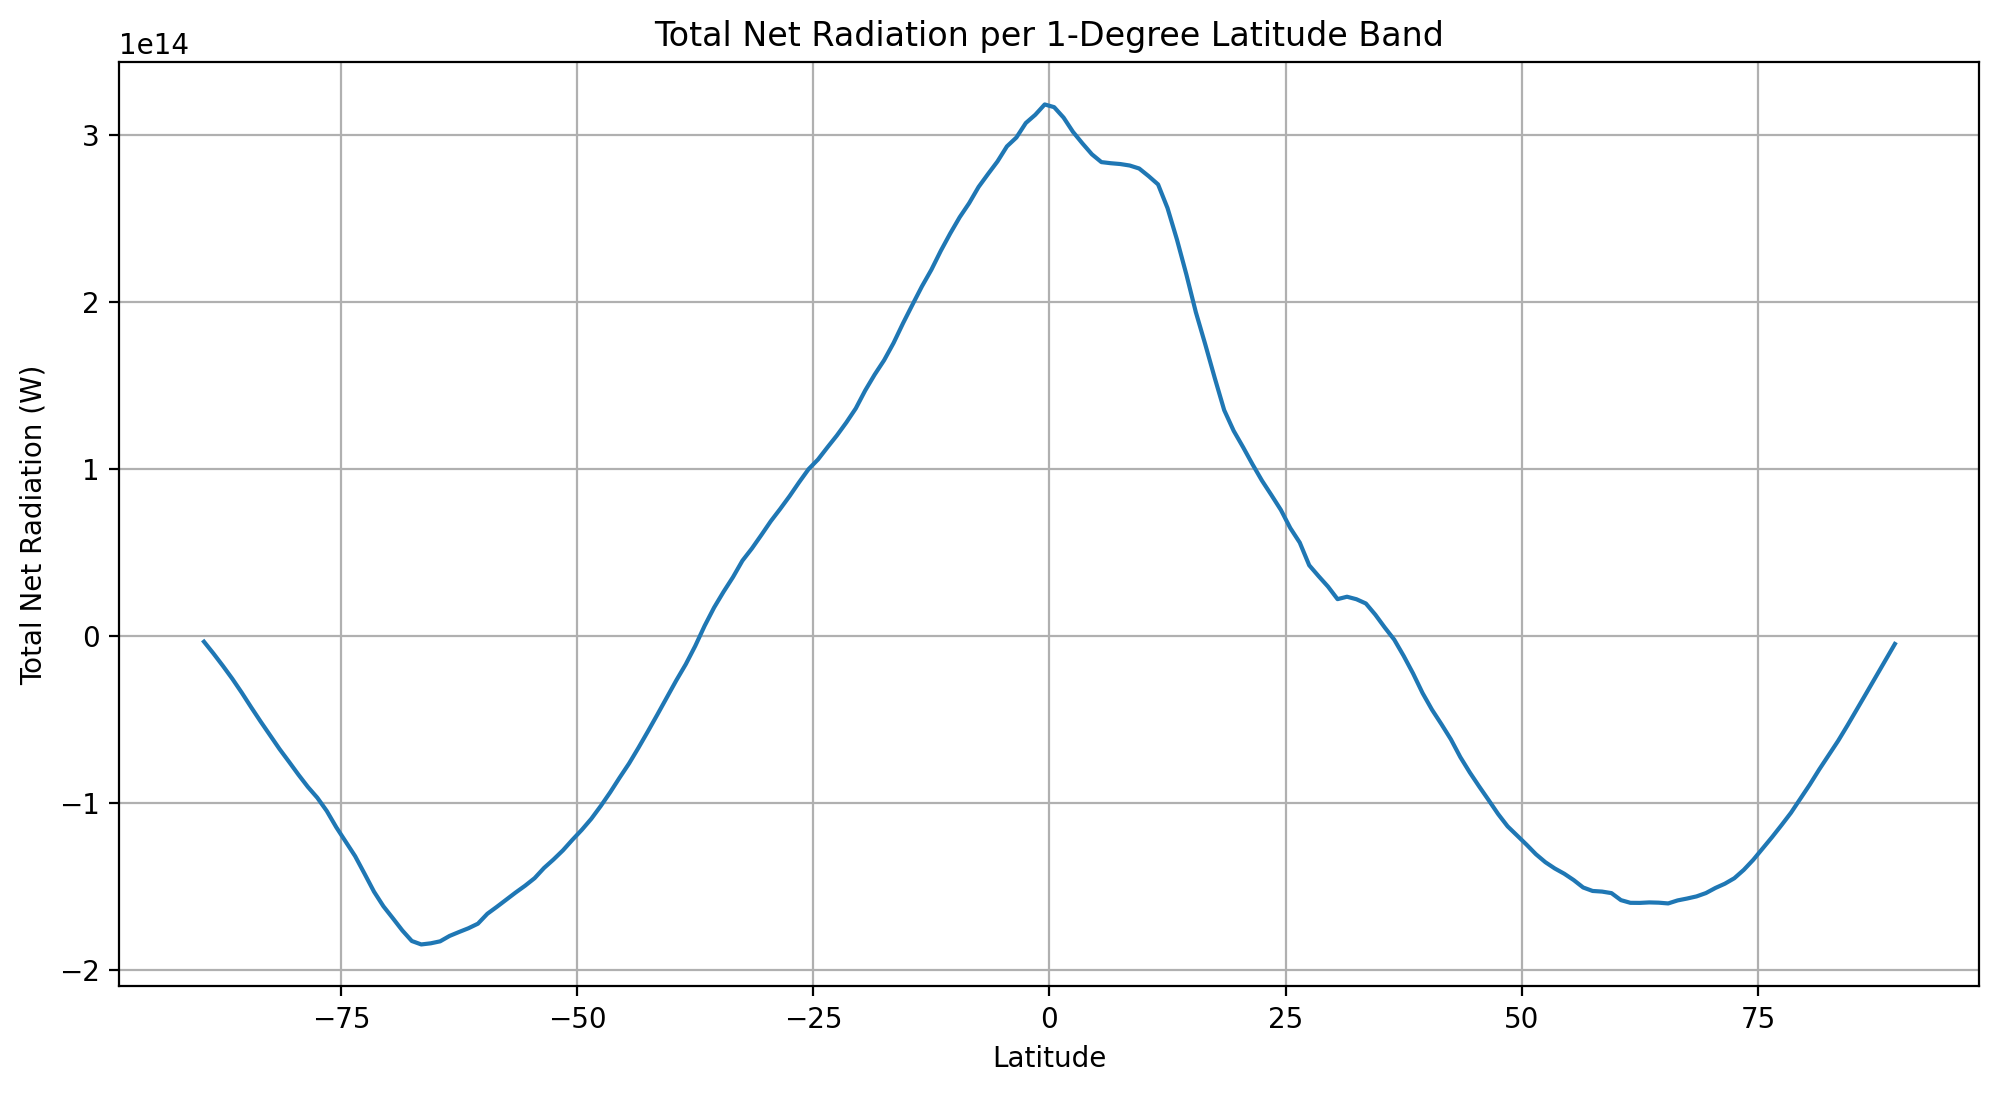

In [16]:
# if for time mean
pixel_area_m2 = pixel_area * 1e6
total_net_radiation_per_pixel = time_mean['toa_net_all_mon'] * pixel_area_m2

total_net_radiation_per_latitude = total_net_radiation_per_pixel.sum(dim='lon')

plt.figure(figsize=(12, 6))
total_net_radiation_per_latitude.plot()

plt.title('Total Net Radiation per 1-Degree Latitude Band')
plt.xlabel('Latitude')
plt.ylabel('Total Net Radiation (W)')
plt.grid(True)
plt.show()


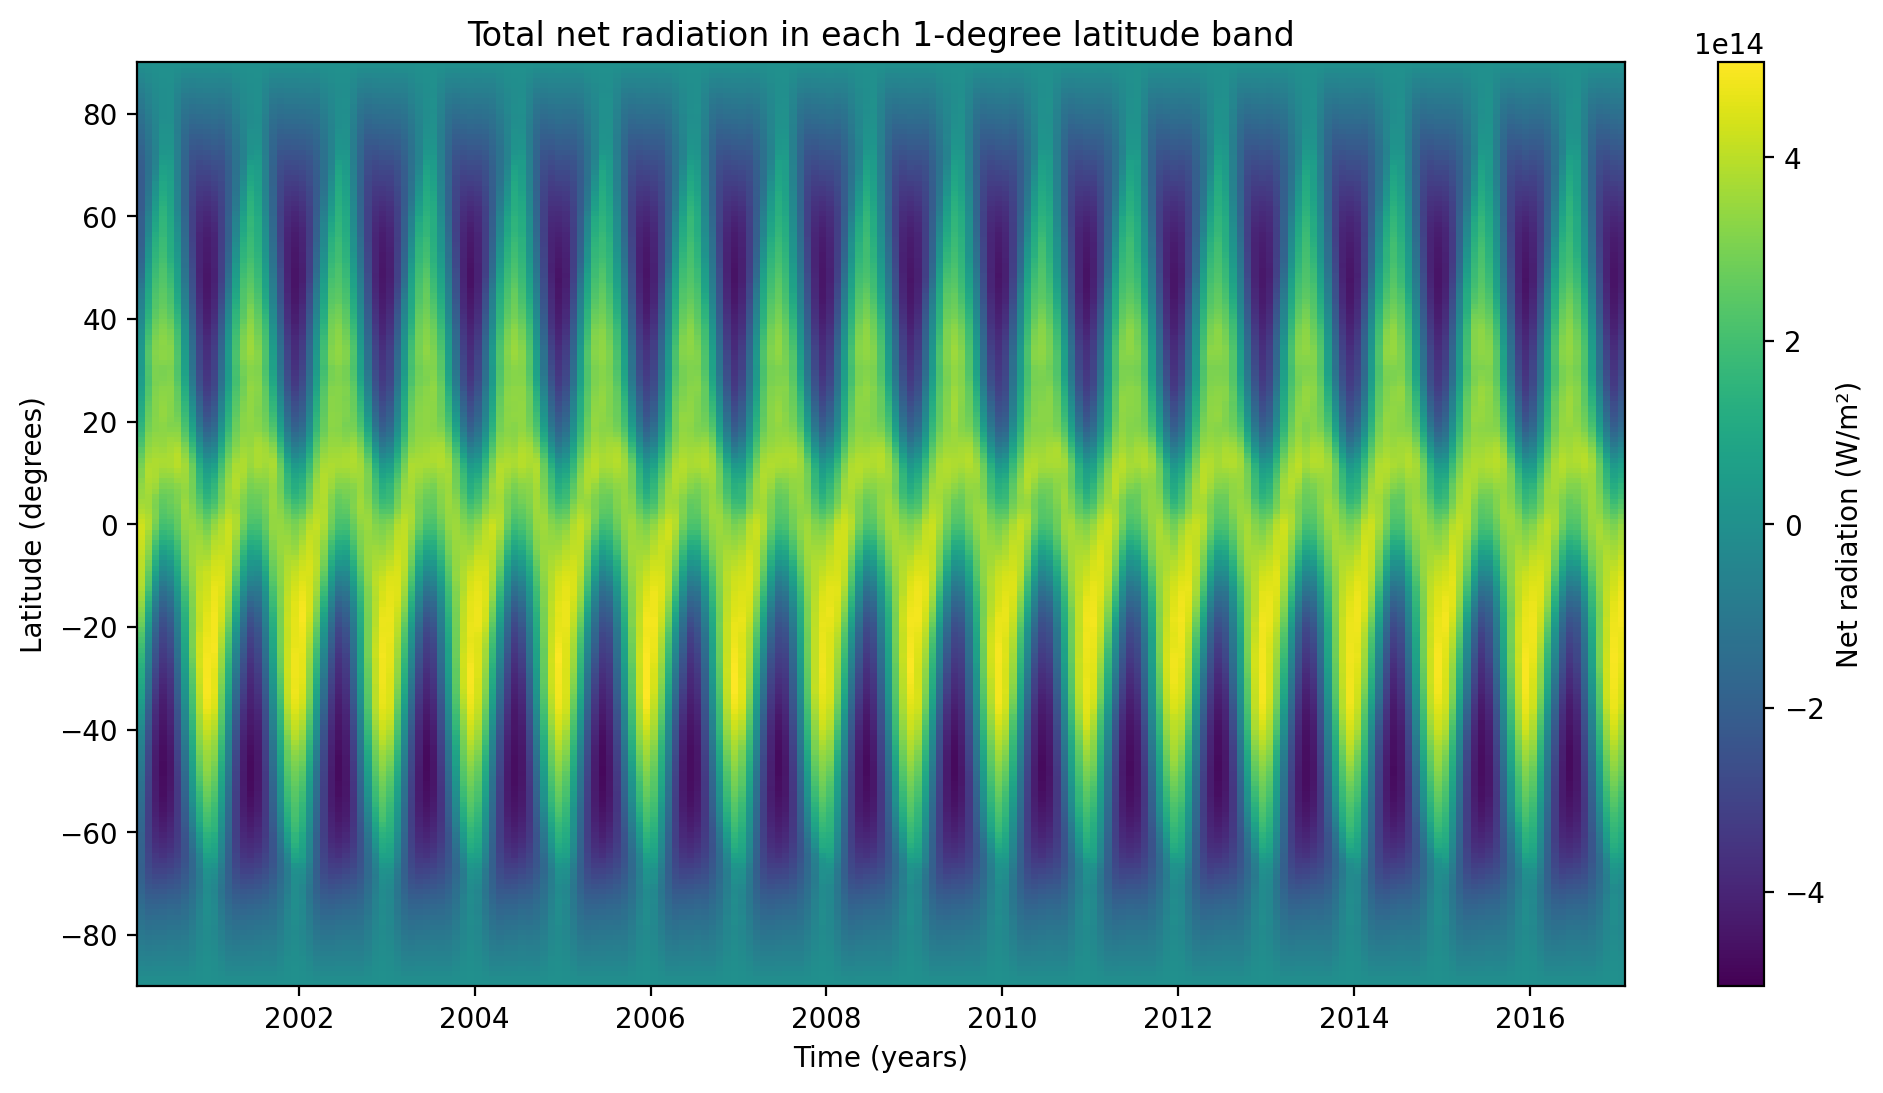

In [17]:
# if show differet times
net_radiation = (pixel_area_m2 * dataset["toa_net_all_mon"]).sum("lon")

fig, ax = plt.subplots(figsize=(12, 6))
net_radiation.plot(ax=ax, cmap='viridis', add_colorbar=False)
cbar = plt.colorbar(ax.collections[0], ax=ax, label='Net radiation (W/m²)')

ax.set_title("Total net radiation in each 1-degree latitude band")
ax.set_xlabel("Time (years)")
ax.set_ylabel("Latitude (degrees)")
plt.show()

### 4.3) Plot the cumulative sum of the total amount of net radiation as a function of latitude

Label with correct units. (Hint: check out xarray's [cumsum](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.cumsum.html) function.)

This curve tells you how much energy must be transported meridionally by the ocean and atmosphere in order to account for the radiative imbalance at the top of the atmosphere.

You should get a curve that looks something like this: https://journals.ametsoc.org/view/journals/clim/14/16/full-i1520-0442-14-16-3433-f07.gif (Figure from Trenberth & Caron, 2001)

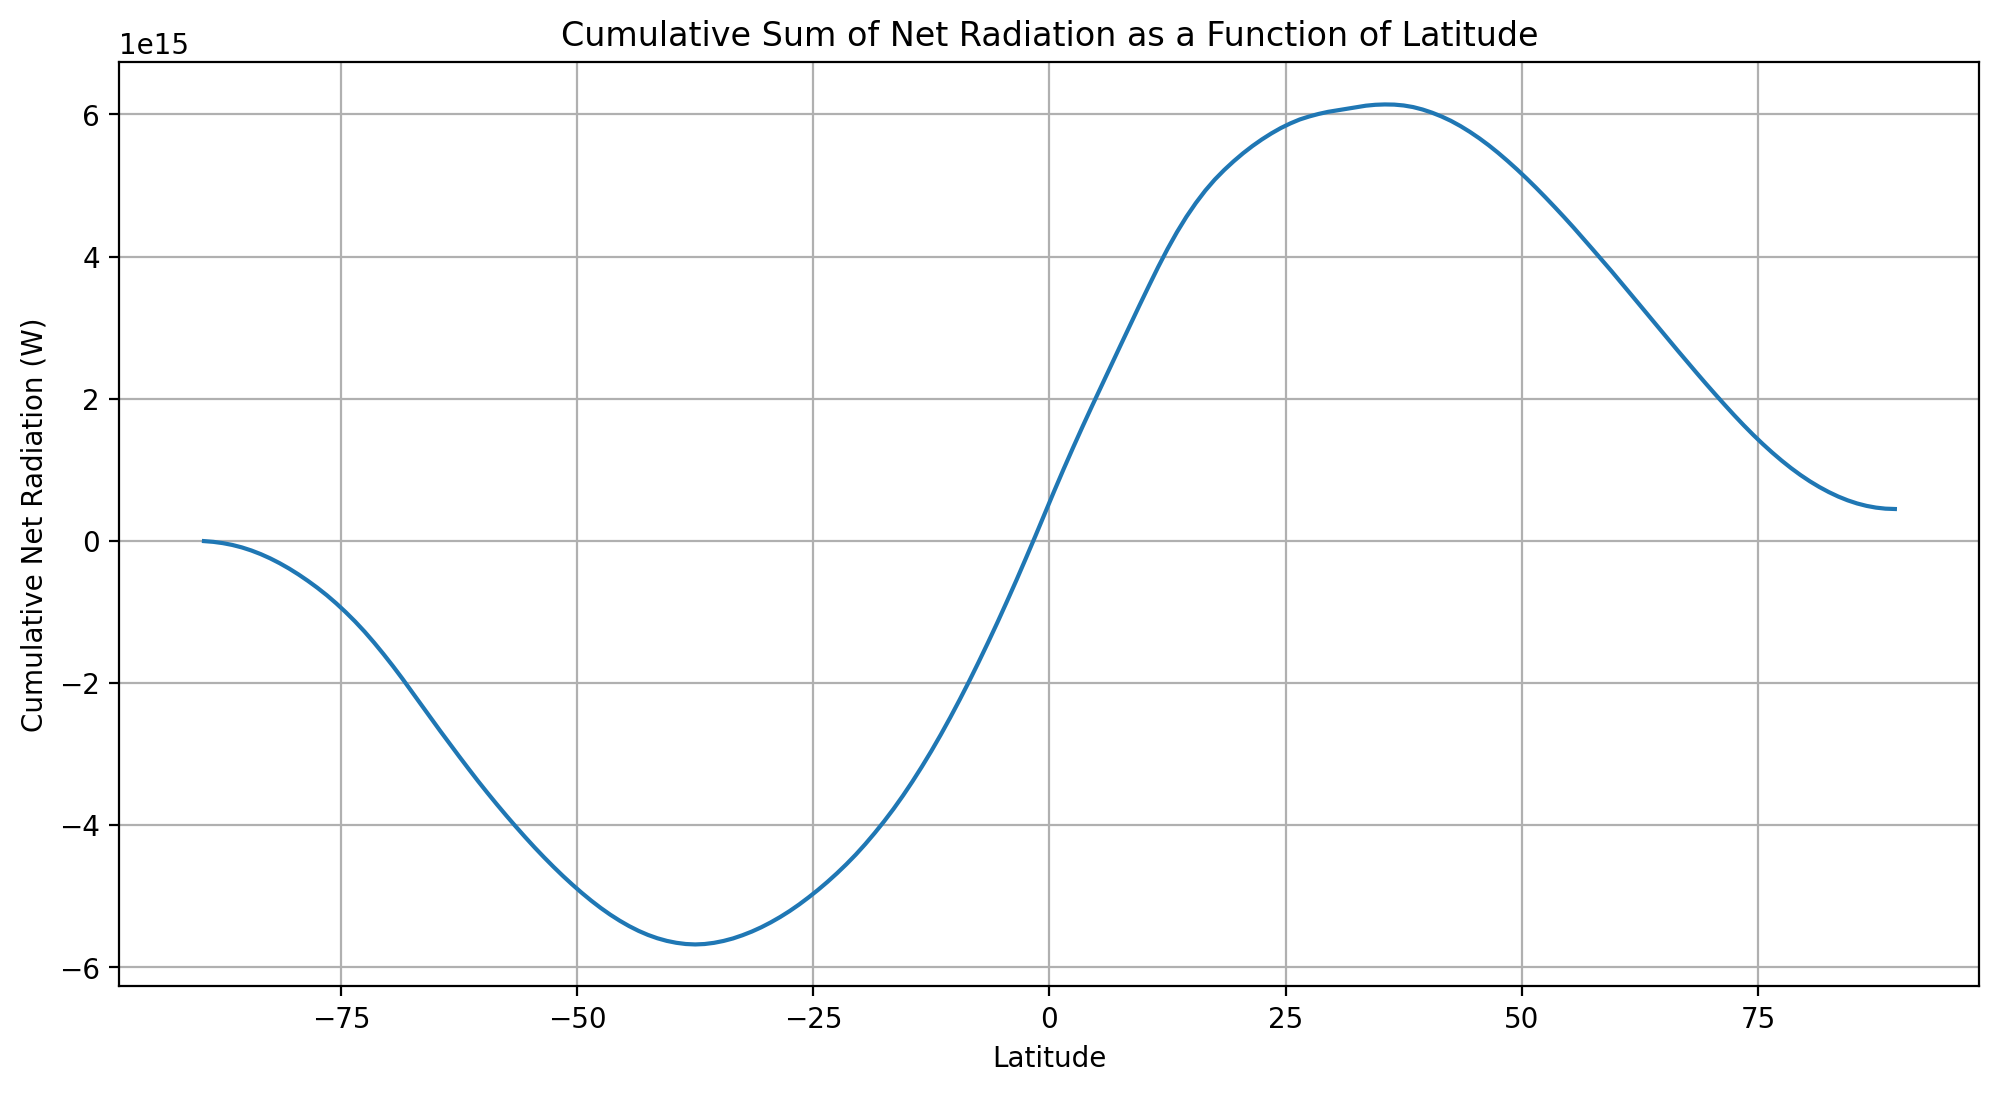

In [18]:
# Calculate the cumulative sum of net radiation per latitude band
cumulative_net_radiation = total_net_radiation_per_latitude.cumsum(dim='lat')

# Plotting
plt.figure(figsize=(12, 6))
cumulative_net_radiation.plot()

plt.title('Cumulative Sum of Net Radiation as a Function of Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cumulative Net Radiation (W)')
plt.grid(True)
plt.show()


## 5) Selecting and Merging Data

For the next problem, use the following approximate locations of four different cities.

| city | lon | lat |
| -- | -- | -- |
| NYC |74 W | 40 N | 
| Nome, Alaska | 165 W | 64 N | 
| Columbo, Sri Lanka | 80 E | 7 N |
| Hobart, Tasmania | 147 E | 43 S |


### 5.1) Create a `Dataset` for each point from the global dataset
Each city should get its own `Dataset` with the same variables as the one you imported. Find the nearest associated incoming solar radiation and net radiation timeseries at each city.

In [19]:
cities = {
    'NYC': {'lon': 360 - 74, 'lat': 40},
    'Nome': {'lon': 360 - 165, 'lat': 64},
    'Colombo': {'lon': 80, 'lat': 7},
    'Hobart': {'lon': 147, 'lat': -43}
}

city_datasets = {}

for city, coords in cities.items():
    city_data = time_mean.sel(lon=coords['lon'], lat=coords['lat'], method='nearest')
    city_datasets[city] = city_data


### 5.2) Merge these four datasets into a new dataset with the new dimension `city`

Create a new dimension coordinate to hold the city name.
Display the merged dataset.

In [20]:
city_dataarrays = []
for city, ds in city_datasets.items():
    ds = ds.assign_coords(city=city)
    ds = ds.expand_dims('city')
    city_dataarrays.append(ds)

merged_dataset = xr.concat(city_dataarrays, dim='city')
merged_dataset


<xarray.Dataset>
Dimensions:                      (city: 4)
Coordinates:
    lon                          (city) float32 286.5 195.5 80.5 147.5
    lat                          (city) float32 40.5 64.5 7.5 -42.5
  * city                         (city) <U7 'NYC' 'Nome' 'Colombo' 'Hobart'
Data variables: (12/14)
    toa_sw_all_mon               (city) float32 97.38 92.65 123.3 102.2
    toa_lw_all_mon               (city) float32 233.6 212.9 232.1 234.3
    toa_net_all_mon              (city) float32 -4.674 -89.67 56.92 -18.79
    toa_sw_clr_mon               (city) float32 39.23 60.39 69.43 54.23
    toa_lw_clr_mon               (city) float32 265.6 229.0 283.5 264.5
    toa_net_clr_mon              (city) float32 21.52 -73.53 59.44 -0.9509
    ...                           ...
    toa_cre_net_mon              (city) float32 -26.19 -16.14 -2.523 -17.84
    solar_mon                    (city) float32 326.3 215.8 412.4 317.8
    cldarea_total_daynight_mon   (city) float32 57.57 67.89 71.71 59.12
    cldpress_total_daynight_mon  (city) float32 530.2 669.3 414.8 585.0
    cldtemp_total_daynight_mon   (city) float32 251.6 252.3 247.1 255.2
    cldtau_total_day_mon         (city) float32 6.165 5.063 4.586 5.571

### 5.3) Plot the incoming solar and net radiation at each city

Make two separate plots.
Try to have your legend created automatically from the data.

/tmp/ipykernel_78952/372841049.py:5: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  method='nearest').drop('lon').drop('lat')


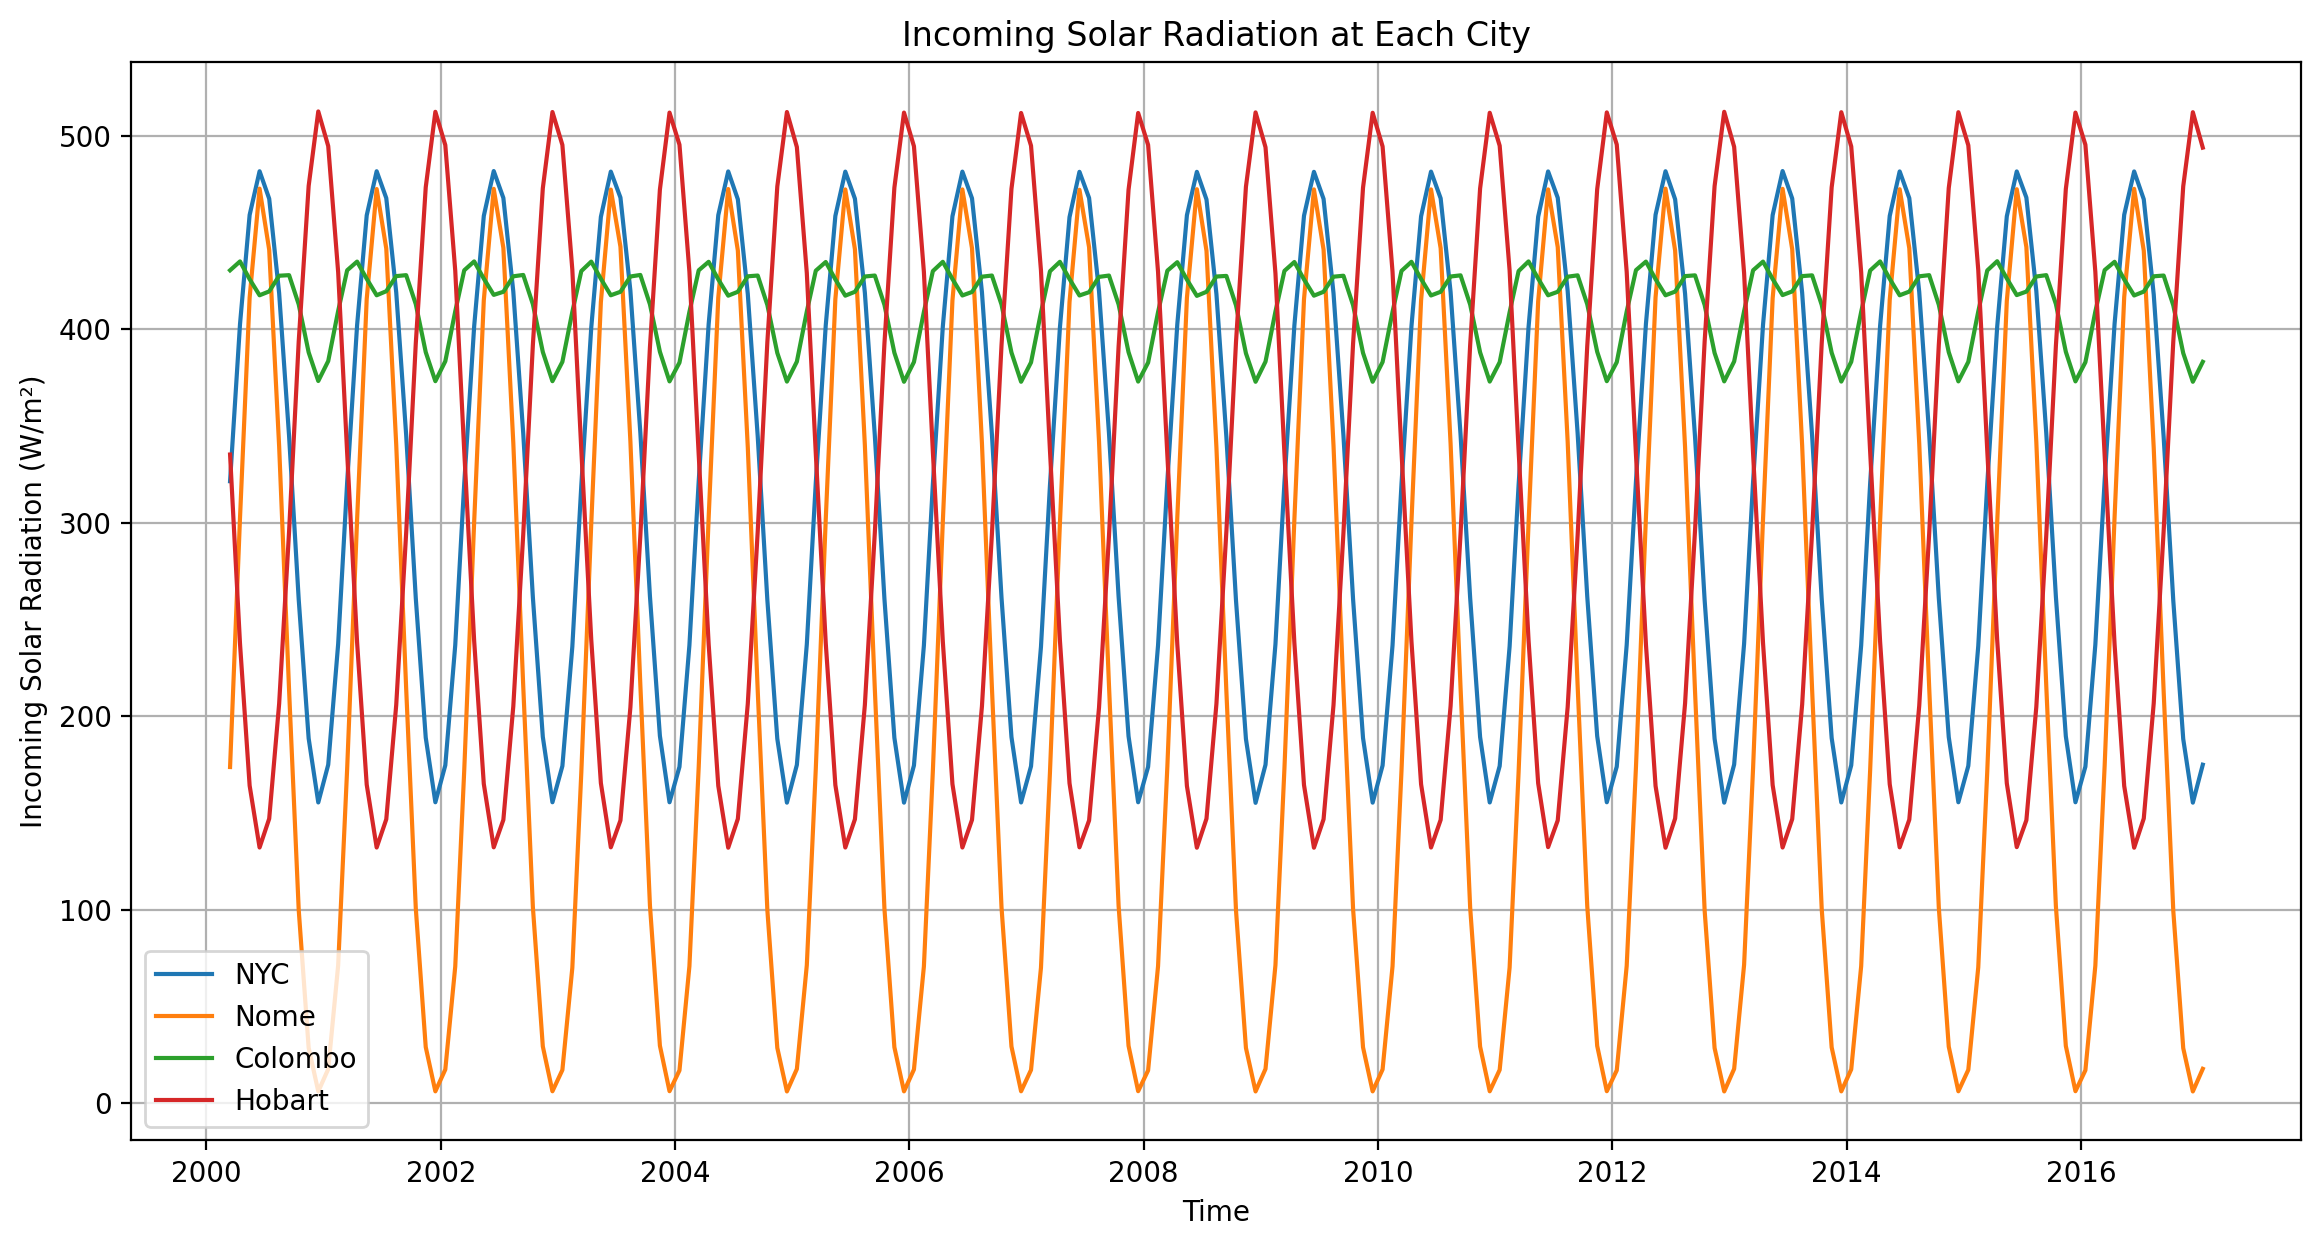

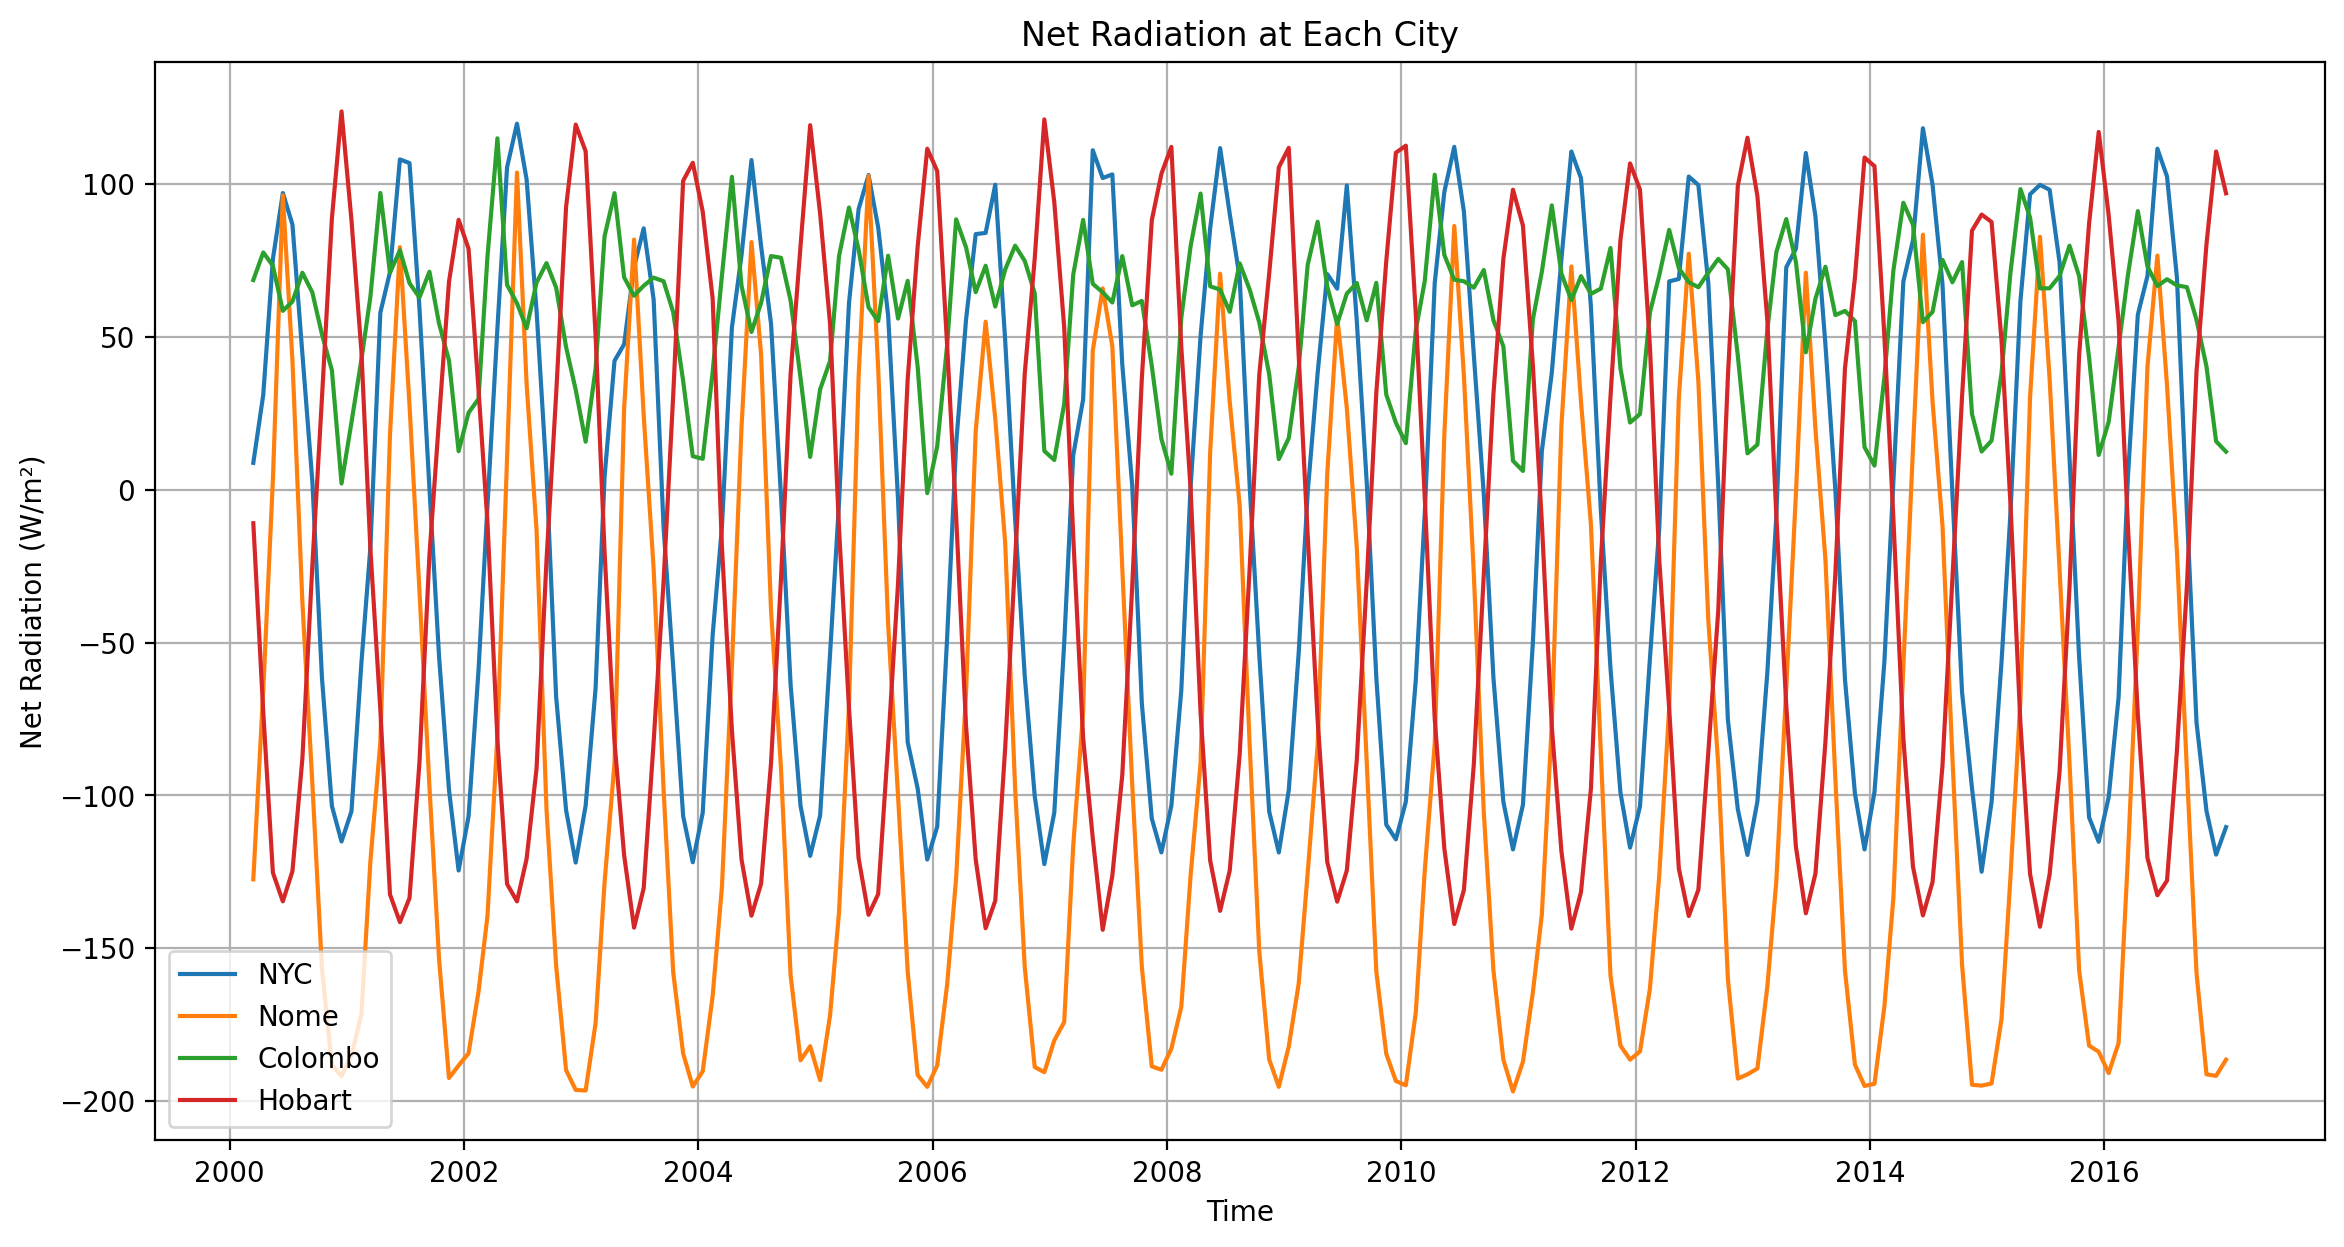

In [21]:
city_datasets = {}
for city, coords in cities.items():
    city_data = dataset.sel(
        lon=coords['lon'], lat=coords['lat'], 
        method='nearest').drop('lon').drop('lat')
    city_datasets[city] = city_data


plt.figure(figsize=(14, 7))
for city, ds in city_datasets.items():
    ds['solar_mon'].plot(label=city)
plt.title('Incoming Solar Radiation at Each City')
plt.xlabel('Time')
plt.ylabel('Incoming Solar Radiation (W/m²)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 7))
for city, ds in city_datasets.items():
    ds['toa_net_all_mon'].plot(label=city)
plt.title('Net Radiation at Each City')
plt.xlabel('Time')
plt.ylabel('Net Radiation (W/m²)')
plt.legend()
plt.grid(True)
plt.show()

